In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *

rcParams['mathtext.rm'] = "Arial"
rcParams['font.family'] = 'Arial'

In [2]:
import matplotlib.font_manager as fm
for f in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'arial' in f.lower():
        print(f)

C:\Windows\Fonts\ARIALN.TTF
C:\Windows\Fonts\arialbi.ttf
C:\Windows\Fonts\arialbd.ttf
C:\Windows\Fonts\ARIALNBI.TTF
C:\Windows\Fonts\ariali.ttf
C:\Windows\Fonts\ARIALNB.TTF
C:\Windows\Fonts\ARIALNI.TTF
C:\Windows\Fonts\arial.ttf


In [3]:
path = "experiment_results"
files = os.listdir(path)
X_datas = []
Y_datas = []
for file in files:
    if file.endswith(".xlsx"):
        full_path = os.path.join(path, file)
        X_datas.append(pd.read_excel(full_path, usecols=["H2O", "Gd(ClO4)3", "Ni-NMIDA", "NaOH", "UREA"]))
        Y_datas.append(pd.read_excel(full_path, usecols=["有无晶体"]))

In [4]:
X = pd.concat(X_datas)
Y = pd.concat(Y_datas)
X = np.array(X)
Y = np.array(Y, dtype = bool)
Y = Y.T[0]

unique_rows, unique_indexes = np.unique(X, axis=0, return_index=True)
print(len(X))
print(len(unique_rows))
X = X[unique_indexes]
y = Y[unique_indexes]

_X_all = X.copy()
_y_all = y.copy()

780
780


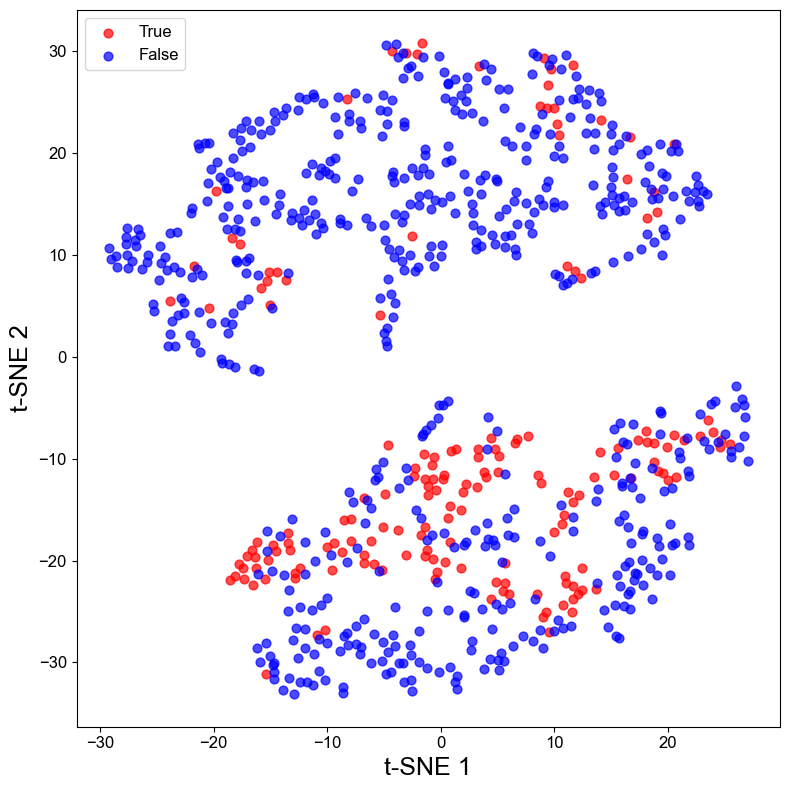

In [5]:
from sklearn.manifold import TSNE
from matplotlib.pyplot import *
from matplotlib import pyplot as plt 

rcParams['mathtext.rm'] = "Arial"
rcParams['font.family'] = 'Arial'

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(8, 8))
label = True
idx = (y == label)
plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=str(label), alpha=0.7, s=40, c = "red")

label = False
idx = (y == label)
plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=str(label), alpha=0.7, s=40, c = "blue")

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12, loc='upper left')

plt.xlabel("t-SNE 1", fontsize=18)
plt.ylabel("t-SNE 2", fontsize=18)

plt.tight_layout()

plt.savefig("./t-SNE.png", dpi = 300)
plt.show()
